Tarea 5 - Proyecto Análisis de Datos

Heidy Mihcelle Ortiz Alvarez

202016908_29

Universidad nacional Abierta y a Distancia - UNAD 

Analisis de Datos

Modelo de Aprendizaje Supervisado "Regresion Lineal"

Paso 1: Análisis Exploratorio de Datos (EDA)

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Cargar el dataset
data = pd.read_csv("C:/Users/miche/OneDrive/Documentos/Downloads/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv")

In [27]:
# Visualizar las primeras filas
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [29]:
# Información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [31]:
# Estadísticas descriptivas
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [33]:
# Análisis de valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

Valores nulos por columna:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Paso 2: Preprocesamiento de Datos

In [39]:
from sklearn.preprocessing import LabelEncoder

# Eliminar columnas irrelevantes
data = data.drop(["Name", "Ticket", "Cabin"], axis=1)

In [41]:
# Imputación de valores nulos en 'Age' con la mediana
data["Age"] = data["Age"].fillna(data["Age"].median())

In [43]:
# Imputación de valores nulos en 'Embarked' con el valor más frecuente (moda)
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [45]:
# Codificación de variables categóricas
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])  # 0 = female, 1 = male
data["Embarked"] = label_encoder.fit_transform(data["Embarked"])  # C=0, Q=1, S=2

In [47]:
# Verificar datos preprocesados
print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked 

Paso 3: Selección de características

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

In [51]:
# Separar características y variable objetivo
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [53]:
# Selección de las mejores características
selector = SelectKBest(score_func=f_classif, k="all")
X_selected = selector.fit_transform(X, y)

In [55]:
# Mostrar puntajes de cada característica
scores = pd.DataFrame({"Característica": X.columns, "Puntaje": selector.scores_})
scores = scores.sort_values(by="Puntaje", ascending=False)
print(scores)

  Característica     Puntaje
2            Sex  372.405724
1         Pclass  115.031272
6           Fare   63.030764
7       Embarked   25.717286
5          Parch    5.963464
3            Age    3.761528
4          SibSp    1.110572
0    PassengerId    0.022285


In [57]:
# Seleccionar características relevantes manualmente (basado en puntajes)
X = data[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
print(X.head())

   Pclass  Sex   Age     Fare  Embarked
0       3    1  22.0   7.2500         2
1       1    0  38.0  71.2833         0
2       3    0  26.0   7.9250         2
3       1    0  35.0  53.1000         2
4       3    1  35.0   8.0500         2


Paso 4: Dividir el Dataset en Train y Test

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Verificar las dimensiones de los conjuntos
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

Dimensiones del conjunto de entrenamiento: (712, 5)
Dimensiones del conjunto de prueba: (179, 5)


Paso 5: Entrenar el Modelo

In [65]:
from sklearn.linear_model import LogisticRegression  # Para clasificación con regresión logística
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [67]:
# Instanciar el modelo
model = LogisticRegression(max_iter=1000)

In [69]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [71]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [73]:
# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [75]:
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Puntaje F1: {f1:.2f}")

Exactitud (Accuracy): 0.80
Precisión (Precision): 0.76
Sensibilidad (Recall): 0.74
Puntaje F1: 0.75


Paso 6: Evaluar el desempeño del modelo con métricas como precisión, recall, F1-score, etc.

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [81]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

In [83]:
# Calcular las métricas de desempeño
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [85]:
# Mostrar los resultados
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precisión global (Accuracy): {accuracy:.4f}")

Precisión: 0.7639
Recall: 0.7432
F1-score: 0.7534
Precisión global (Accuracy): 0.7989


In [87]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[88 17]
 [19 55]]


Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Matriz de Confusión:

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

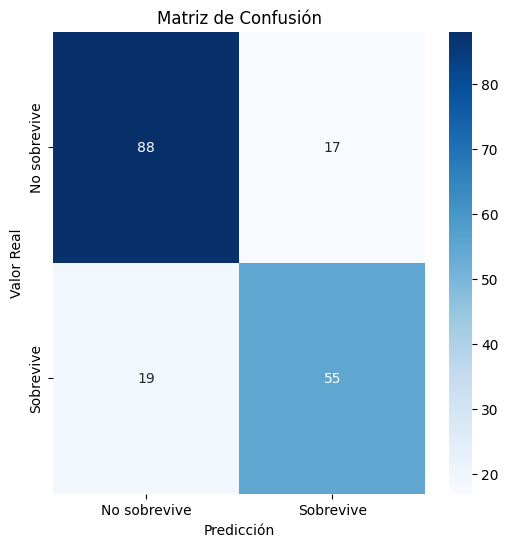

In [91]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevive", "Sobrevive"], yticklabels=["No sobrevive", "Sobrevive"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

Curva ROC y AUC:

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [95]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

In [97]:
# Calcular el AUC (Área bajo la curva)
auc = roc_auc_score(y_test, y_pred)

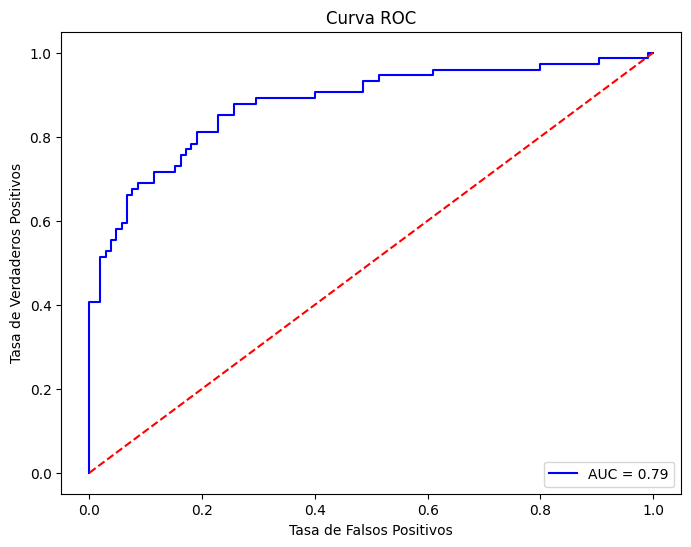

In [99]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()